In [1]:
import arviz as az
import matplotlib.cm as cmap
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import aesara_theano_fallback.tensor as tt


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Exponential quadratic

$$k(x,x') = \exp{[\frac{(x-x')^2}{2l^2}]}

In [2]:
lengthscale = 0.2
eta = 2.
cov = eta ** 2 * pm.gp.cov.ExpQuad(1, ls=lengthscale)

In [3]:
X = np.linspace(0,2,200)[:,None]

/opt/anaconda3/envs/starry-env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


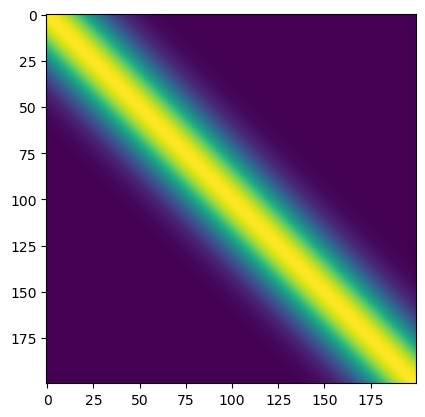

In [4]:
# let's visualize the covariance
plt.imshow(cov(X).eval())

In [5]:
# adding white noise
cov += pm.gp.cov.WhiteNoise(1e-6)

In [6]:
K = cov(X).eval()
pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=K.shape[0]).random(size=3).T.shape

(200, 3)

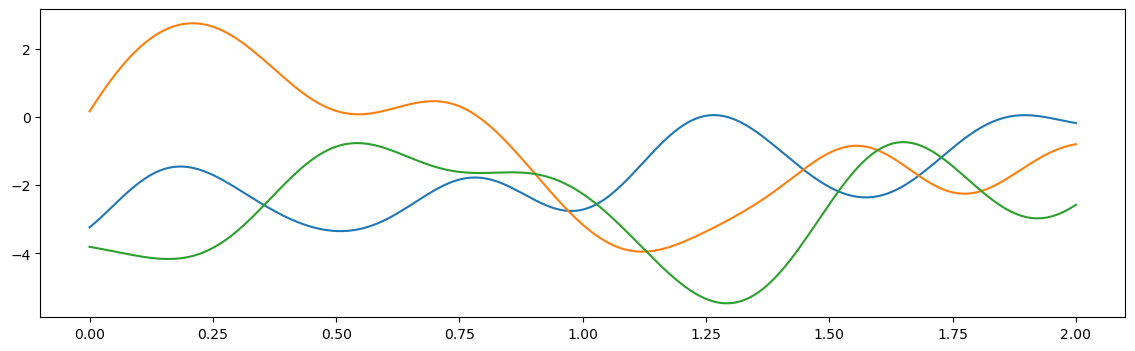

In [7]:
# three random samples from the GP prior
plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=K.shape[0]).random(size=3).T)

### Two dimensional inputs 

In [8]:
x1 = np.linspace(0,1,10);
x2 = np.arange(1,4)
# cartesian product
X2 = np.dstack(np.meshgrid(x1,x2)).reshape(-1,2)
ls = np.array([0.2,1.])
cov = pm.gp.cov.ExpQuad(input_dim=2,ls=ls)

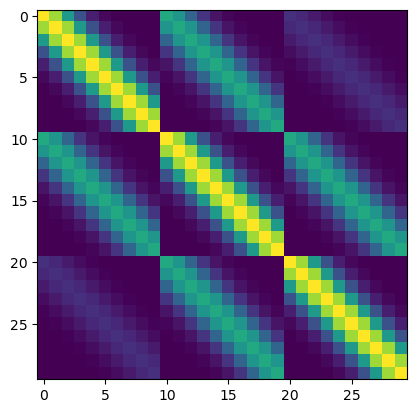

In [9]:
plt.imshow(cov(X2).eval())

In [10]:
print(cov(X2).eval())

[[1.00000000e+00 8.56996891e-01 5.39407507e-01 2.49352209e-01
  8.46579886e-02 2.11096565e-02 3.86592014e-03 5.19975743e-04
  5.13655312e-05 3.72665317e-06 6.06530660e-01 5.19794890e-01
  3.27167191e-01 1.51239760e-01 5.13476657e-02 1.28036539e-02
  2.34479909e-03 3.15381231e-04 3.11547695e-05 2.26032941e-06
  1.35335283e-01 1.15981917e-01 7.30008678e-02 3.37461518e-02
  1.14572129e-02 2.85688134e-03 5.23195397e-04 7.03710645e-05
  6.95156871e-06 5.04347663e-07]
 [8.56996891e-01 1.00000000e+00 8.56996891e-01 5.39407507e-01
  2.49352209e-01 8.46579886e-02 2.11096565e-02 3.86592014e-03
  5.19975743e-04 5.13655312e-05 5.19794890e-01 6.06530660e-01
  5.19794890e-01 3.27167191e-01 1.51239760e-01 5.13476657e-02
  1.28036539e-02 2.34479909e-03 3.15381231e-04 3.11547695e-05
  1.15981917e-01 1.35335283e-01 1.15981917e-01 7.30008678e-02
  3.37461518e-02 1.14572129e-02 2.85688134e-03 5.23195397e-04
  7.03710645e-05 6.95156871e-06]
 [5.39407507e-01 8.56996891e-01 1.00000000e+00 8.56996891e-01
  5.

In [11]:
cov = pm.gp.cov.ExpQuad(input_dim=2,ls=ls,active_dims=[0])

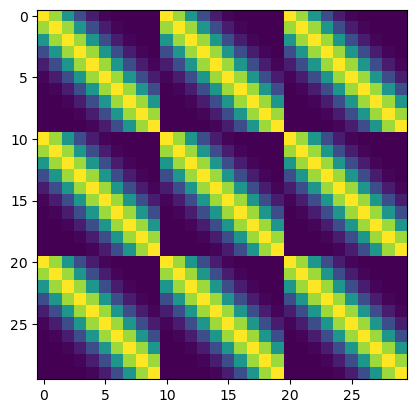

In [12]:
plt.imshow(cov(X2).eval())

In [13]:
# product of covariances 
cov1 = pm.gp.cov.ExpQuad(input_dim=2,ls=ls[0],active_dims=[0])
cov2 = pm.gp.cov.ExpQuad(input_dim=2,ls=ls[1],active_dims=[1])
cov = cov1 * cov2

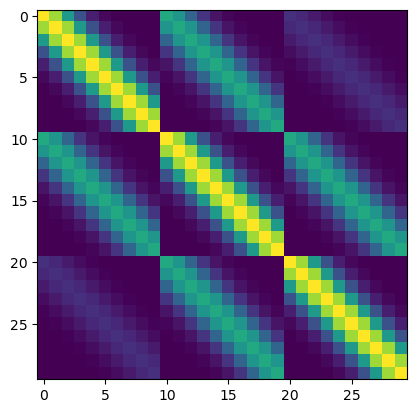

In [14]:
plt.imshow(cov(X2).eval())

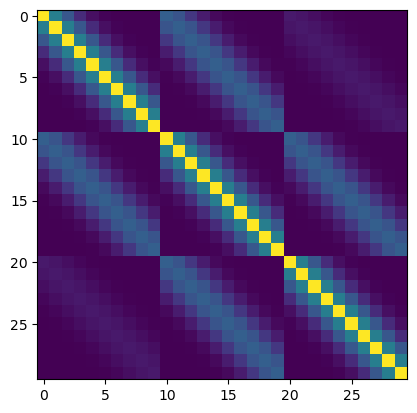

In [15]:
cov += pm.gp.cov.WhiteNoise(1)
plt.imshow(cov(X2).eval())

# White noise

$$k(x,x')=\sigma^2 I_{xx}$$

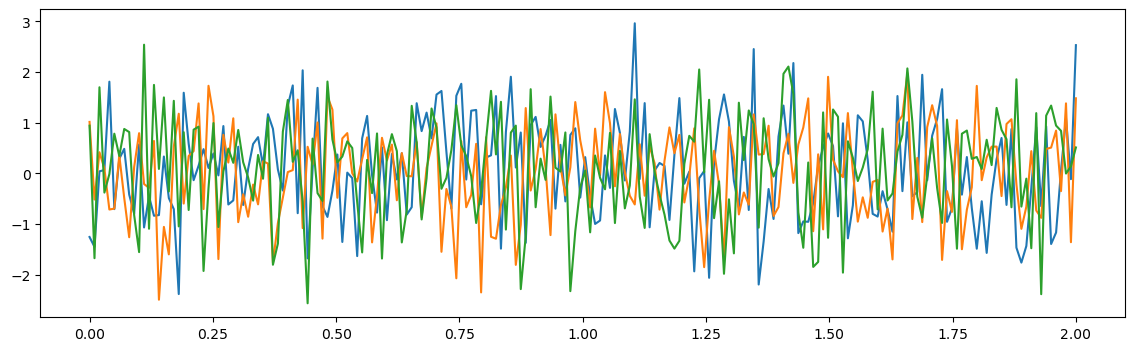

In [16]:
sigma = 1.
cov = pm.gp.cov.WhiteNoise(sigma)

X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

# three random samples from the GP prior
plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)

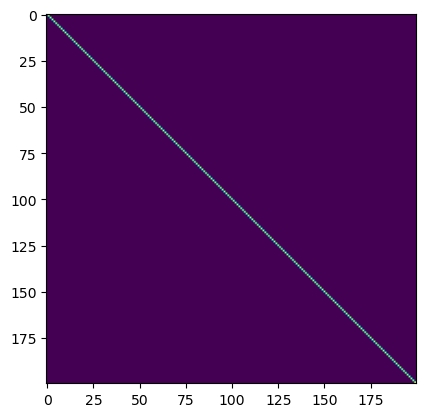

In [17]:
plt.imshow(K)

# Constant 
$$k(x,x')=c$$

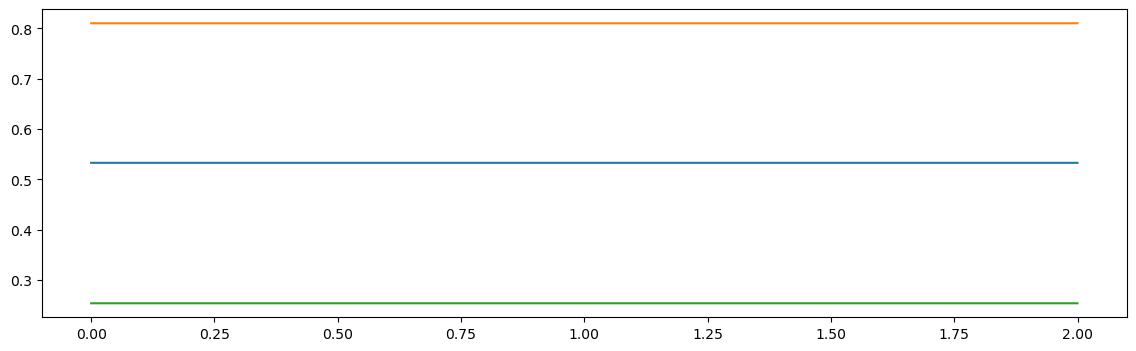

In [18]:
c = 2.0
cov = pm.gp.cov.Constant(c)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-6)

X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)

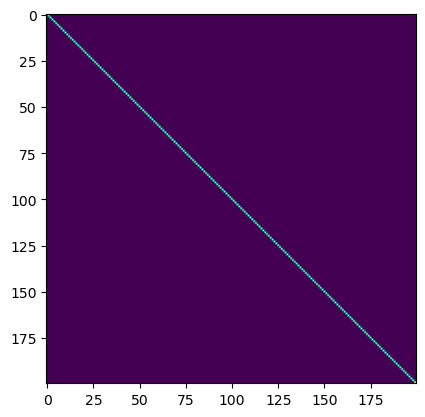

In [19]:
plt.imshow(K)

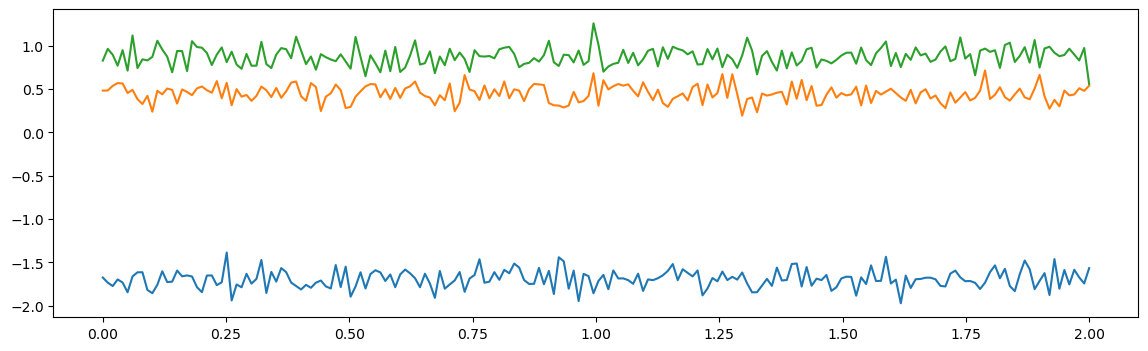

In [20]:
# greater white noise
c = 2.0
cov = pm.gp.cov.Constant(c)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-1)

X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)

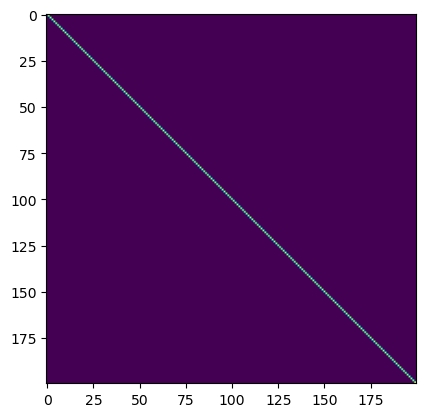

In [21]:
plt.imshow(K)

# Rational quadratic
$$k(x,x')=(1+\frac{(x-x')^2}{2\alpha l^2})^{-\alpha}$$

In [22]:
alpha = 0.1
ls = 0.2
tau = 2.
cov = tau * pm.gp.cov.RatQuad(input_dim=1,alpha=alpha,ls=ls)

In [23]:
X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

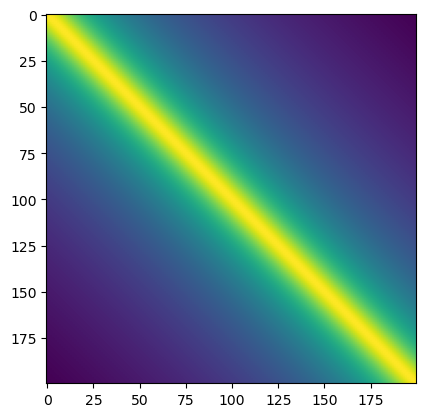

In [24]:
plt.imshow(K)

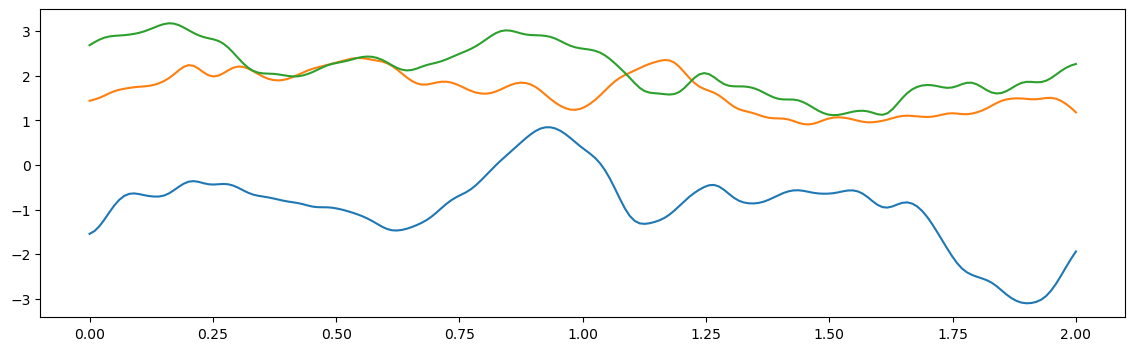

In [25]:
plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)

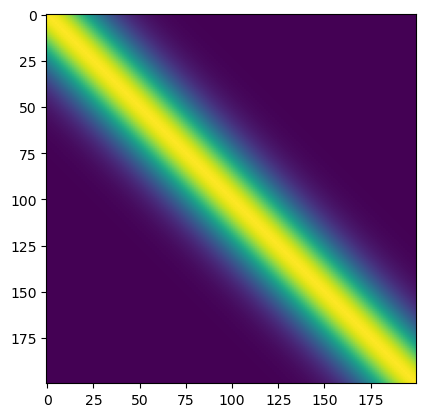

In [26]:
# if alpha is large enough then the cov looks like the squared exponential 
alpha = 10
ls = 0.2
tau = 2.
cov = tau * pm.gp.cov.RatQuad(input_dim=1,alpha=alpha,ls=ls)
X = np.linspace(0, 2, 200)[:, None]

# for large alpha, the cov matrix is not positive definite! Need to add some white noise:
cov += pm.gp.cov.WhiteNoise(1e-1)
K = cov(X).eval()

plt.imshow(K)

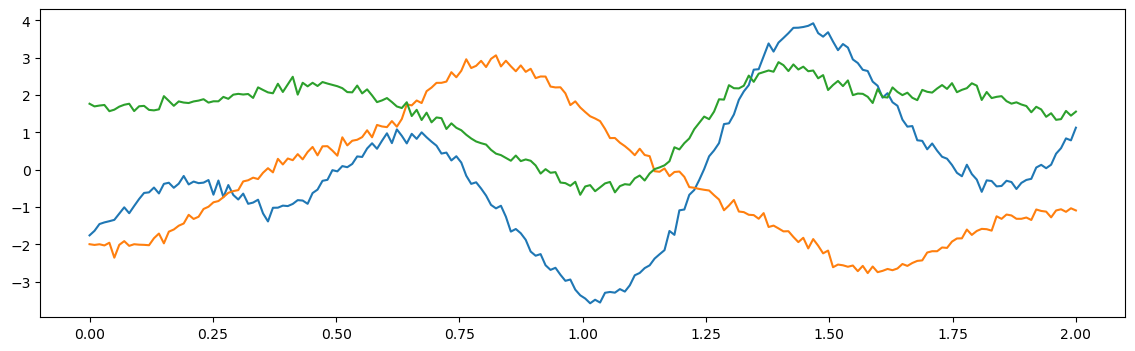

In [27]:
plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)

# Exponential
$$k(x,x')=\exp[\frac{\vert\vert x-x'\vert\vert}{2l^2}]$$

Text(0.5, 1.0, 'Samples from the GP prior')

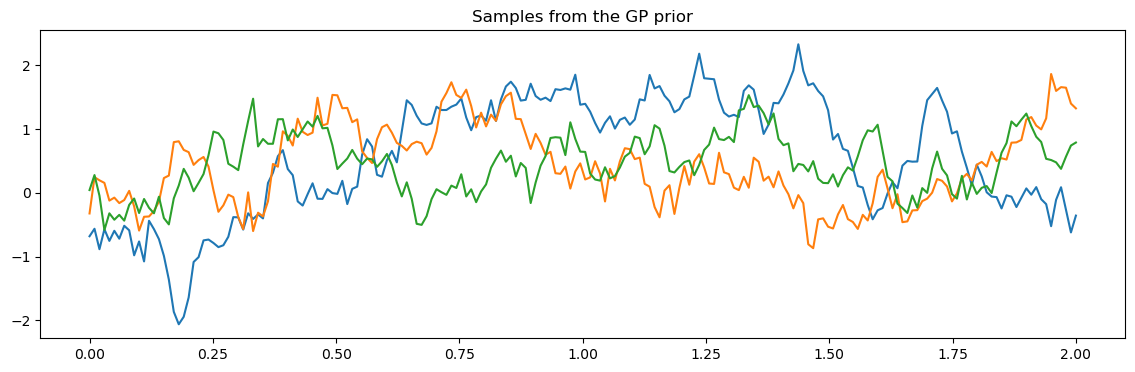

In [32]:
inverse_lengthscale = 6
cov = pm.gp.cov.Exponential(1, ls_inv=inverse_lengthscale)

X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)
plt.title("Samples from the GP prior")

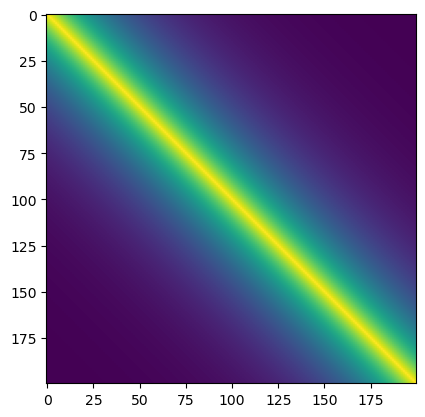

In [33]:
plt.imshow(K)

In [36]:
# print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in K))

# Cosine
$$k(x,x')=\cos (2\pi\frac{\vert\vert x-x'\vert\vert}{l^2})$$

Text(0.5, 1.0, 'Samples from the GP prior')

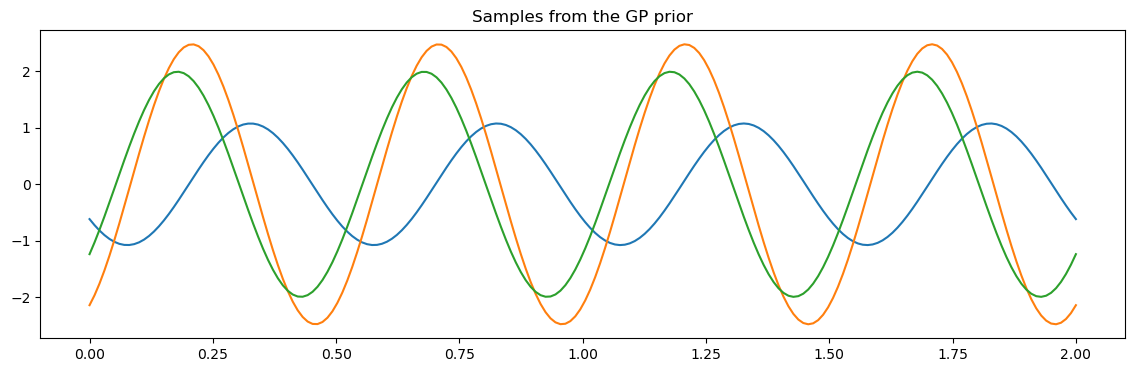

In [37]:
period = 0.5
cov = pm.gp.cov.Cosine(1, period)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-4)

X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)
plt.title("Samples from the GP prior")

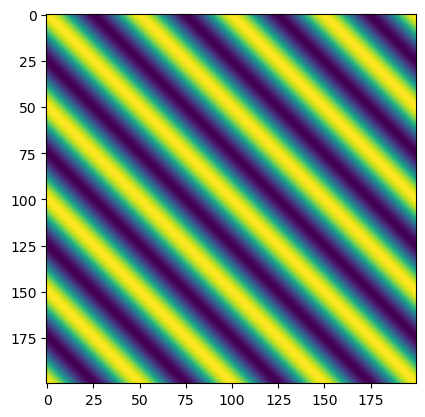

In [38]:
plt.imshow(K)

# Linear
$$k(x-x')=(x-c)(x'-c)$$

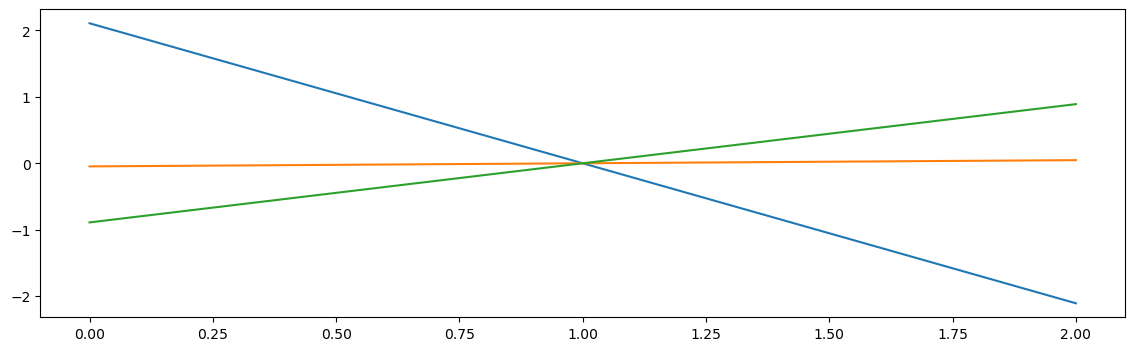

In [39]:
c = 1.0
tau = 2.0
cov = tau * pm.gp.cov.Linear(1, c)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-6)

X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)

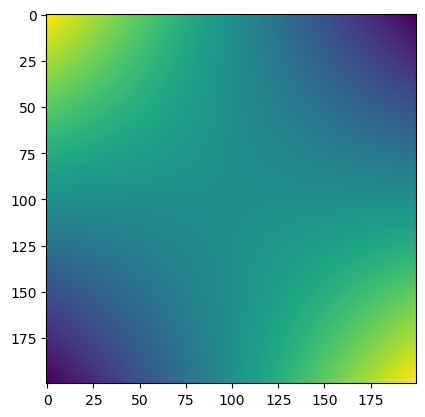

In [40]:
plt.imshow(K)

In [41]:
K

array([[ 2.        ,  1.9798995 ,  1.95979899, ..., -1.95979899,
        -1.9798995 , -2.        ],
       [ 1.9798995 ,  1.96000101,  1.94010252, ..., -1.94010252,
        -1.96000101, -1.9798995 ],
       [ 1.95979899,  1.94010252,  1.92040605, ..., -1.92040605,
        -1.94010252, -1.95979899],
       ...,
       [-1.95979899, -1.94010252, -1.92040605, ...,  1.92040605,
         1.94010252,  1.95979899],
       [-1.9798995 , -1.96000101, -1.94010252, ...,  1.94010252,
         1.96000101,  1.9798995 ],
       [-2.        , -1.9798995 , -1.95979899, ...,  1.95979899,
         1.9798995 ,  2.        ]])

# Polynomial
$$k(x-x')=[(x-c)(x'-c)+offset]^d

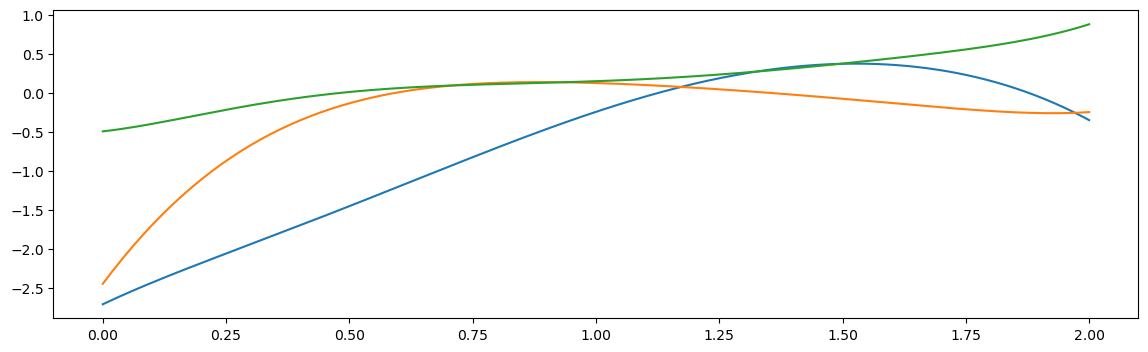

In [44]:
c = 1.0
d = 6
offset = 1.0
tau = 0.1
cov = tau * pm.gp.cov.Polynomial(1, c=c, d=d, offset=offset)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-6)

X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)

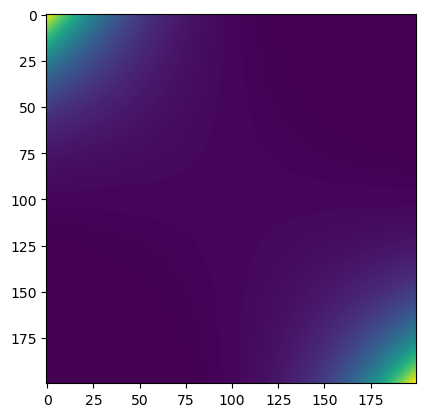

In [45]:
plt.imshow(K)

In [46]:
K

array([[6.40000000e+00, 6.20944318e+00, 6.02363811e+00, ...,
        6.59540531e-12, 1.03053208e-13, 0.00000000e+00],
       [6.20944318e+00, 6.02548218e+00, 5.84608547e+00, ...,
        7.21557952e-11, 6.39903039e-12, 1.03053208e-13],
       [6.02363811e+00, 5.84608547e+00, 5.67291571e+00, ...,
        3.97283348e-10, 7.21557952e-11, 6.59540531e-12],
       ...,
       [6.59540531e-12, 7.21557952e-11, 3.97283348e-10, ...,
        5.67291571e+00, 5.84608547e+00, 6.02363811e+00],
       [1.03053208e-13, 6.39903039e-12, 7.21557952e-11, ...,
        5.84608547e+00, 6.02548218e+00, 6.20944318e+00],
       [0.00000000e+00, 1.03053208e-13, 6.59540531e-12, ...,
        6.02363811e+00, 6.20944318e+00, 6.40000000e+00]])

# Applying an arbitary warping function on the inputs
If $k(x,x')$ is a valid covariance function, then so is $k(w(x),w(x'))$. 

The first argument of the warping function must be the input X. The remaining arguments can be anything else, including random variables.

/opt/anaconda3/envs/starry-env/lib/python3.8/site-packages/pymc3/gp/cov.py:92: UserWarning: Only 1 column(s) out of Subtensor{int64}.0 are being used to compute the covariance function. If this is not intended, increase 'input_dim' parameter to the number of columns to use. Ignore otherwise.
  warnings.warn(


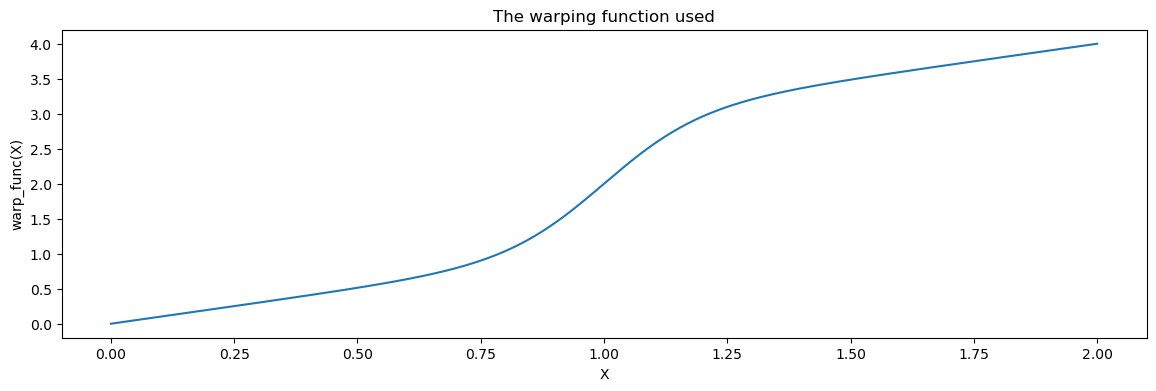

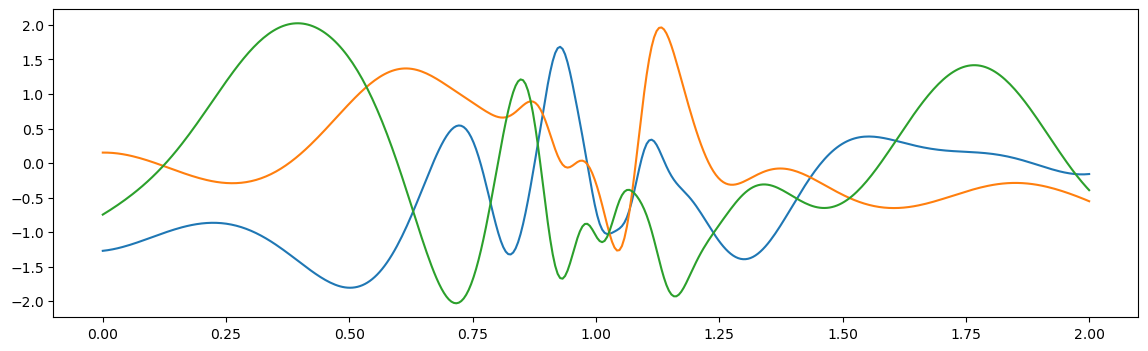

In [47]:
def warp_func(x, a, b, c):
    return 1.0 + x + (a * tt.tanh(b * (x - c)))

a = 1.0
b = 5.0
c = 1.0

cov_exp = pm.gp.cov.ExpQuad(1, 0.2)
cov = pm.gp.cov.WarpedInput(1, warp_func=warp_func, args=(a, b, c), cov_func=cov_exp)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-6)

X = np.linspace(0, 2, 400)[:, None]
wf = warp_func(X.flatten(), a, b, c).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, wf)
plt.xlabel("X")
plt.ylabel("warp_func(X)")
plt.title("The warping function used")

K = cov(X).eval()
plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)

# Scaled covariance
One can construct a new kernel or covariance function by multiplying some base kernel by a nonnegative function $\phi(x)$,
$$k_{scaled}(x,x')=\phi(x)k_{base}(x,x')\phi(x')$$
This is useful for specifying covariance functions whose amplitude changes across the domain.

/opt/anaconda3/envs/starry-env/lib/python3.8/site-packages/pymc3/gp/cov.py:92: UserWarning: Only 1 column(s) out of Subtensor{int64}.0 are being used to compute the covariance function. If this is not intended, increase 'input_dim' parameter to the number of columns to use. Ignore otherwise.
  warnings.warn(


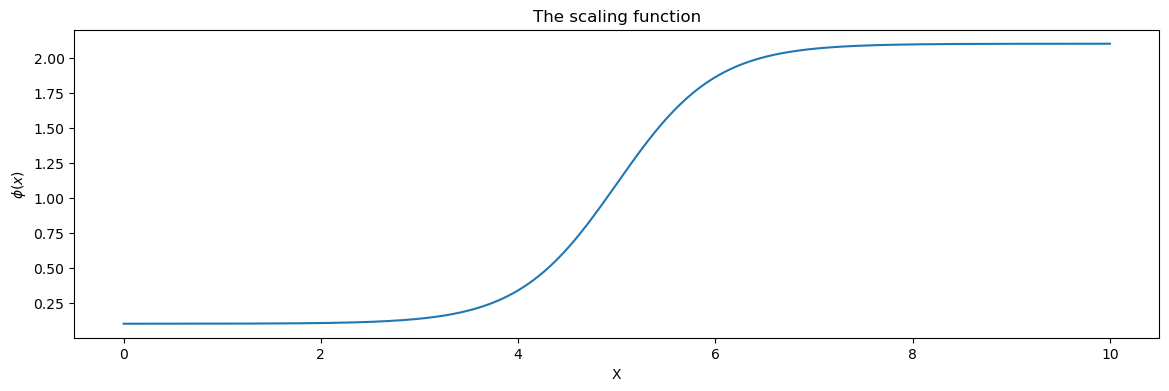

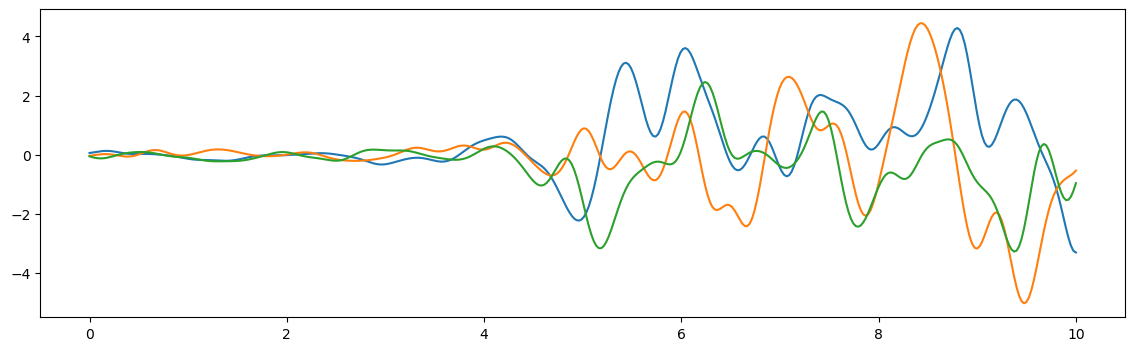

In [48]:
def logistic(x, a, x0, c, d):
    # a is the slope, x0 is the location
    return d * pm.math.invlogit(a * (x - x0)) + c


a = 2.0
x0 = 5.0
c = 0.1
d = 2.0

cov_base = pm.gp.cov.ExpQuad(1, 0.2)
cov = pm.gp.cov.ScaledCov(1, scaling_func=logistic, args=(a, x0, c, d), cov_func=cov_base)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-5)

X = np.linspace(0, 10, 400)[:, None]
lfunc = logistic(X.flatten(), a, b, c, d).eval()

plt.figure(figsize=(14, 4))
plt.plot(X, lfunc)
plt.xlabel("X")
plt.ylabel(r"$\phi(x)$")
plt.title("The scaling function")

K = cov(X).eval()
plt.figure(figsize=(14, 4))
plt.plot(X, pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=len(K)).random(size=3).T)